<a href="https://www.kaggle.com/code/devanshshukla123/nueral-network-from-scratch?scriptVersionId=248191506" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np

data = {
    'Feature1': [2.5, 3.6, 1.2, 4.0, 0.9, 1.3, 3.5, 1.0],
    'Feature2': [1.7, 2.4, 3.8, 0.5, 4.1, 3.9, 0.8, 4.0],
    'Label': [0, 0, 1, 0, 1, 1, 0, 1]
}

df = pd.DataFrame(data)
X = df[['Feature1', 'Feature2']].values
x = np.array(X).T
y = df['Label'].values.reshape(1, -1)
y = np.array(y)

# activation functions

In [2]:
def relu(x):
    return np.maximum(0, x)

def softmax(x):
    exps = np.exp(x - np.max(x, axis=0, keepdims=True))
    return exps / np.sum(exps, axis=0, keepdims=True)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def regularization(x):
    if x > 0.5:
        return 1
    else:
        return 0

# loss function for binary classification

In [3]:
def binary_cross_entropy(y_true, y_pred):
  
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# accuracy score

In [4]:
def accuracy(y_true, y_pred):
    predictions = (y_pred > 0.5).astype(int)
    return np.mean(predictions == y_true)

# initializing variables

In [5]:
def intial():
    w1 = np.random.randn(4, 2)
    w2 = np.random.randn(1, 4)
    b1 = np.random.randn(4, 1)
    b2 = np.random.randn(1, 1)
    return w1, w2, b1, b2

# forward propogation of data

In [6]:
def forward(w1, b1, w2, b2, x):
    z1 = np.dot(w1, x) + b1
    a1 = relu(z1)
    z2 = np.dot(w2, a1) + b2
    a2 = sigmoid(z2)
    return z1, a1, z2, a2

# back propogation

In [7]:
def der(z):
    return (z > 0).astype(float)

def backprop(w1, w2, z1, a1, z2, a2, x, y):
    dz2 = a2 - y
    n = y.shape[1]
    dw2 = 1/n * np.dot(dz2, a1.T)
    db2 = 1/n * np.sum(dz2, axis=1, keepdims=True)
    dz1 = np.dot(w2.T, dz2) * der(z1)
    dw1 = 1/n * np.dot(dz1, x.T)
    db1 = 1/n * np.sum(dz1, axis=1, keepdims=True)
    return dw1, db1, dw2, db2

# gradient descent and weight bias update

In [8]:
def update(w1, b1, w2, b2, dw1, db1, dw2, db2, lr=0.01):
    w1 = w1 - lr * dw1
    b1 = b1 - lr * db1
    w2 = w2 - lr * dw2
    b2 = b2 - lr * db2
    return w1, b1, w2, b2

In [9]:
def itr(x, y, epoch, alpha):
    w1, w2, b1, b2 = intial()
    losses = []
    accuracies = []
    for i in range(epoch):
        z1, a1, z2, a2 = forward(w1, b1, w2, b2, x)
        loss = binary_cross_entropy(y, a2)
        acc = accuracy(y, a2)
        losses.append(loss)
        accuracies.append(acc)
        dw1, db1, dw2, db2 = backprop(w1, w2, z1, a1, z2, a2, x, y)
        w1, b1, w2, b2 = update(w1, b1, w2, b2, dw1, db1, dw2, db2, lr=alpha)
        if i % 10 == 0:
            print(f"Epoch {i}, Loss: {loss:.4f}, Accuracy: {acc:.4f}")
    return w1, b1, w2, b2, losses, accuracies

# epochs

In [10]:
w1, b1, w2, b2, losses, accuracies = itr(x, y, 100, 0.01)

Epoch 0, Loss: 1.3672, Accuracy: 0.0000
Epoch 10, Loss: 0.6869, Accuracy: 0.5000
Epoch 20, Loss: 0.4528, Accuracy: 1.0000
Epoch 30, Loss: 0.3375, Accuracy: 1.0000
Epoch 40, Loss: 0.2705, Accuracy: 1.0000
Epoch 50, Loss: 0.2255, Accuracy: 1.0000
Epoch 60, Loss: 0.1937, Accuracy: 1.0000
Epoch 70, Loss: 0.1697, Accuracy: 1.0000
Epoch 80, Loss: 0.1511, Accuracy: 1.0000
Epoch 90, Loss: 0.1361, Accuracy: 1.0000


# result plotting

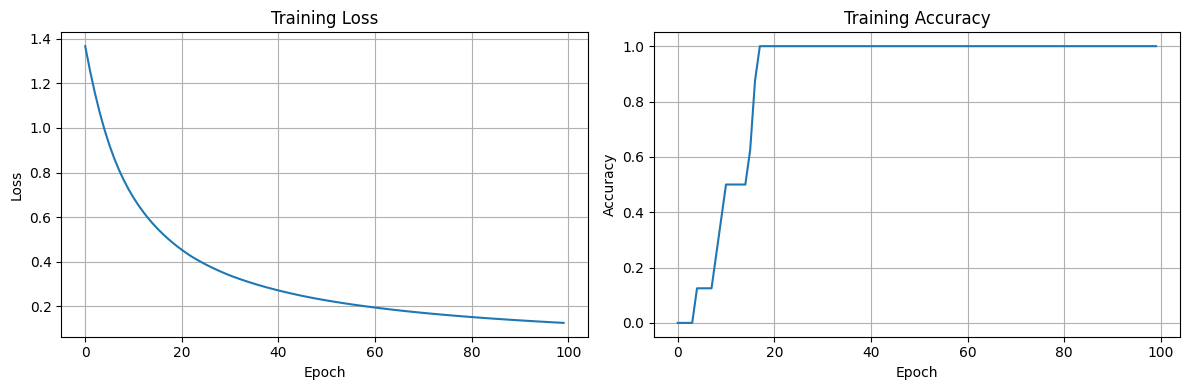

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(accuracies)
plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)

plt.tight_layout()
plt.show()